#### 1. Sample Preparation

In [1]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

df = pd.read_csv("Creditcard_data.csv")
Xdf = df.drop("Class", axis=1).values
ydf = df["Class"].values

us = RandomUnderSampler(random_state=42, replacement=True)
X_us, y_us = us.fit_resample(Xdf, ydf)
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(Xdf, ydf)
os = RandomOverSampler(random_state=42)
X_os, y_os = os.fit_resample(Xdf, ydf)
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(Xdf, ydf)
st = SMOTETomek()
X_st, y_st = st.fit_resample(Xdf, ydf)

sampling = [
    ('Random Undersampling', X_us, y_us),
    ('Near-Miss', X_nm, y_nm),
    ('Random Oversampling', X_os, y_os),
    ('SMOTE', X_sm, y_sm),
    ('SMOTETomek', X_st, y_st),
]

#### 2. Importing ML models  

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Extreme Gradient Boosting':xgb.XGBClassifier()
}

#### 3. Model fitting and Evaluation

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
def perform_cross_validation(model, X, y):
    return cross_val_score(model, X, y, cv=4, scoring=make_scorer(accuracy_score))
results={}
for model_name, model in models.items():
    model_results = {}
    for dataset_name, X_train_ds, y_train_ds in sampling:
        scores = perform_cross_validation(model, X_train_ds, y_train_ds)
        model_results[dataset_name] = scores.mean()
    results[model_name] = model_results
dfres = pd.DataFrame(results)
dfres.to_csv("102103037_Result.csv", index=True)
dfres

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Logistic Regression,Random Forest,Gradient Boosting,K-Nearest Neighbors,Extreme Gradient Boosting
Random Undersampling,0.525000,0.587500,0.687500,0.575000,0.737500
Near-Miss,0.500000,0.387500,0.437500,0.650000,0.450000
Random Oversampling,0.904960,0.999344,0.893704,0.718873,0.902891
SMOTE,0.891832,0.971793,0.894366,0.582547,0.867464
SMOTETomek,0.892954,0.986450,0.898374,0.586043,0.880759


#### 4. Finding best sampling method for each model

In [4]:
def best_sample(x):
    bs = x.idxmax()
    ba = x.max()
    return pd.Series({'Sampling Method': bs, 'Accuracy': ba})

best = dfres.apply(best_sample, axis=0)

print("Best Sampling Methods for every Model: ")
best.to_csv("102103037_Best.csv", index=True)
best

Best Sampling Methods for every Model: 


,Logistic Regression,Random Forest,Gradient Boosting,K-Nearest Neighbors,Extreme Gradient Boosting
Sampling Method,Random Oversampling,Random Oversampling,SMOTETomek,Random Oversampling,Random Oversampling
Accuracy,0.90496,0.999344,0.898374,0.718873,0.902891


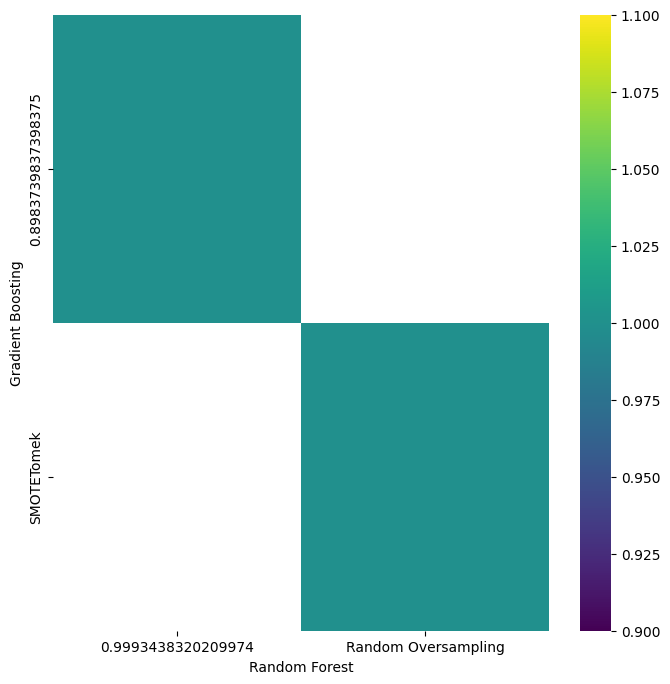

In [6]:
# @title Random Forest vs Gradient Boosting

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gradient Boosting'].value_counts()
    for x_label, grp in best.groupby('Random Forest')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Random Forest')
_ = plt.ylabel('Gradient Boosting')

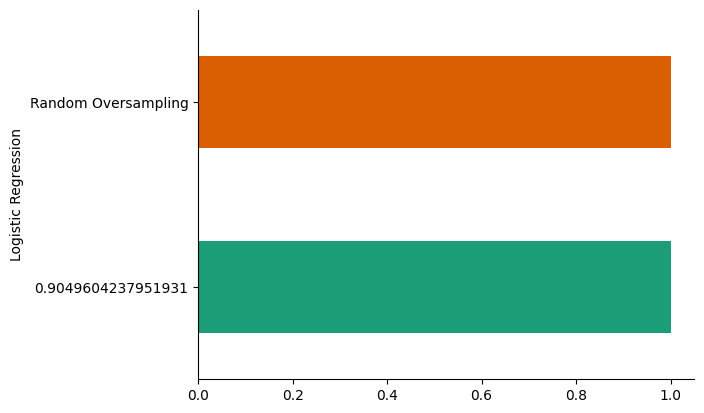

In [5]:
# @title Logistic Regression

from matplotlib import pyplot as plt
import seaborn as sns
best.groupby('Logistic Regression').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)